**mzTbs**

_General_

mzTab is meant to be a light-weight, tab-delimited file format for proteomics data. The target audience for this format are primarily researchers outside of proteomics. It should be easy to parse and only contain the minimal information required to evaluate the results of a proteomics experiment. The aim of the format is to present the results of a proteomics experiment in a computationally accessible overview. The aim is not to provide the detailed evidence for these results, or allow recreating the process which led to the results. Both of these functions are established through links to more detailed representations in other formats, in particular mzIdentML and mzQuantML [Ref1](https://code.google.com/archive/p/mztab/). Besides, mzTab can be used alone or with those other formats [Ref2](https://www.ncbi.nlm.nih.gov/pmc/articles/PMC4189001/)

**Warning**:Although mzTab can be used to report a detailed view on data, it explicitly does not aim to capture the whole complexity and evidence trail of a proteomics study. Even the most complex mzTab files still include simplifications/assumptions of the experimental results. This, for instance, is the case in identification (e.g. protein inference/grouping is only supported to a limited extent) and quantification results (e.g. the coordinates for isotope patterns in quantified two-dimensional “features” cannot be fully reported). This missing information can be reported using the existing PSI standard formats mzIdentML and mzQuantML.  

_File content_

Section:
- MTD: metadata - was deliberately kept flexible, and the majority of fields are optional. Therefore, it is possible to report different levels of experimental annotation depending on the interest of the producer of the files, ranging from basic annotations to the complete
- PRH: protein hearder
- PRT: protein identifications 
- PEH: peptide header
- PEP: peptide identifications
- PSH: peptide-spectrum  hearder
- PSM: peptide-spectrum match - indicates whether the peptides were unambiguously assigned to a given protein. 
- SMH: small molecules hearder  - is used to report aggregated quantification data based on several PSMs.
- SML: small molecules identifications
- COM: comments 


<!-- ![Fig1](/home/tiago/documents/lncRNA/Study/Fig1_mztabe_content.jpg) -->


In [75]:
import urllib.parse
import urllib.request
import uniprot
import requests as r
from Bio import SeqIO
from io import StringIO

def get_sequences(accession:list,file_name:str):
    # convert pride accession number to swissprot accession number
    databases_url = 'https://www.uniprot.org/uploadlists/'
    params = {
    'from': 'ACC+ID', #pride accession
    'to': 'REFSEQ_NT_ID', #swissprot accession
    'format': 'list',
    'query': f'{" ".join(accession)}'
    }
    pride_accession = urllib.parse.urlencode(params)
    pride_accession = pride_accession.encode('utf-8')
    req = urllib.request.Request(databases_url, pride_accession)
    with urllib.request.urlopen(req) as accession_file:
        response = accession_file.read()
    swissprot_accession = list(response.decode('utf-8').split("\n"))
    
    # Get protein sequences from swissprot
    swissprot_url = "http://www.uniprot.org/uniprot/"
    with open(f"{file_name}.fasta","w+") as fasta:
        for IDs in swissprot_accession:
            joint_url = swissprot_url + IDs + ".fasta"
            swissprot_response = r.post(joint_url)
            raw_data = "".join(swissprot_response.text)
            Seq = StringIO(raw_data)
            for seq_info in SeqIO.parse(Seq,'fasta'):
                if "Uncharacterized protein" in seq_info.description:
                    fasta.write(f">{seq_info.description}\n")
                    fasta.write(f"{seq_info.seq}\n")
    return fasta
        

In [2]:
from pyteomics import mztab

### 1. Examples

In [52]:
coffie = mztab.MzTab("/home/tiago/documents/lncRNA/C.arabica/PXD002963/generated/2experimentos.pride.mztab")
soja = mztab.MzTab("/home/tiago/documents/lncRNA/G.max/PXD000247/generated/PRIDE_Exp_Complete_Ac_29517.pride.mztab")
arab = mztab.MzTab("/home/tiago/documents/lncRNA/A.thaliana/PRD000392/generated/PRIDE_Exp_Complete_Ac_16506.pride.mztab")

- PRT: protein identifications 
- PEP: peptide identifications
- PSM: peptide-spectrum match - indicates whether the peptides were unambiguously assigned to a given protein. 
- SML: small molecules identifications

In [35]:
coffie["PRT"].head()

,accession,description,taxid,species,database,database_version,search_engine,best_search_engine_score[1],search_engine_score[1]_ms_run[1],search_engine_score[1]_ms_run[2],...,num_peptides_unique_ms_run[15],num_peptides_unique_ms_run[16],num_peptides_unique_ms_run[17],num_peptides_unique_ms_run[18],num_peptides_unique_ms_run[19],num_peptides_unique_ms_run[20],num_peptides_unique_ms_run[21],ambiguity_members,modifications,protein_coverage
accession,,,,,,,,,,,,,,,,,,,,,
A0A068U1Z5_COFCA,A0A068U1Z5_COFCA,Eukaryotic translation initiation factor 3 sub...,None,None,uniprot-taxonomy%3Acoffee.fasta,None,"[Mascot, X!Tandem, Scaffold]",None,NaN,NaN,...,None,None,None,None,None,None,None,None,None,None
A0A068TTF0_COFCA,A0A068TTF0_COFCA,"Coffea canephora DH200=94 genomic scaffold, sc...",None,None,uniprot-taxonomy%3Acoffee.fasta,None,"[Mascot, X!Tandem, Scaffold]",None,NaN,NaN,...,None,None,None,None,None,None,None,None,464-UNIMOD:4,None
A0A068U9U8_COFCA,A0A068U9U8_COFCA,"Coffea canephora DH200=94 genomic scaffold, sc...",None,None,uniprot-taxonomy%3Acoffee.fasta,None,"[Mascot, X!Tandem, Scaffold]",None,NaN,NaN,...,None,None,None,None,None,None,None,None,None,None
A0A068URX2_COFCA,A0A068URX2_COFCA,ATP-dependent Clp protease proteolytic subunit...,None,None,uniprot-taxonomy%3Acoffee.fasta,None,"[Mascot, X!Tandem, Scaffold]",None,NaN,NaN,...,None,None,None,None,None,None,None,None,None,None
A0A068TYH5_COFCA,A0A068TYH5_COFCA,"Coffea canephora DH200=94 genomic scaffold, sc...",None,None,uniprot-taxonomy%3Acoffee.fasta,None,"[Mascot, X!Tandem, Scaffold]",None,NaN,NaN,...,None,None,None,None,None,None,None,None,None,None


In [76]:
soja["PRT"].head()

,accession,description,taxid,species,database,database_version,search_engine,best_search_engine_score[1],search_engine_score[1]_ms_run[1],num_psms_ms_run[1],...,num_peptides_unique_ms_run[1],ambiguity_members,modifications,protein_coverage,opt_global_cv_PRIDE:0000303_Decoy_hit,opt_global_num_merge_proteins,opt_global_duplicated_proteins_search_engines,opt_global_duplicated_proteins_best_search_engines_score,opt_global_duplicated_proteins_search_engines_scores,opt_global_duplicated_proteins_had_quantification
accession,,,,,,,,,,,,,,,,,,,,,
Glyma0041s00280.1,Glyma0041s00280.1,None,None,None,ENSEMBL,12,analysis software,0.0,0.0,1,...,None,None,None,0.0,0,1,None,None,None,0
Glyma0080s00230.1,Glyma0080s00230.1,None,None,None,ENSEMBL,12,analysis software,0.0,0.0,1,...,None,None,None,0.0,0,1,None,None,None,0
Glyma0169s00200.1,Glyma0169s00200.1,None,None,None,ENSEMBL,12,analysis software,0.0,0.0,1,...,None,None,None,0.0,0,1,None,None,None,0
Glyma0169s00200.2,Glyma0169s00200.2,None,None,None,ENSEMBL,12,analysis software,0.0,0.0,1,...,None,None,None,0.0,0,1,None,None,None,0
Glyma0169s00210.1,Glyma0169s00210.1,None,None,None,ENSEMBL,12,analysis software,0.0,0.0,7,...,None,None,None,0.0,0,1,None,None,None,0


In [37]:
arab["PRT"].head()

,accession,description,taxid,species,database,database_version,search_engine,best_search_engine_score[1],search_engine_score[1]_ms_run[1],num_psms_ms_run[1],...,num_peptides_unique_ms_run[1],ambiguity_members,modifications,protein_coverage,opt_global_cv_PRIDE:0000303_Decoy_hit,opt_global_num_merge_proteins,opt_global_duplicated_proteins_search_engines,opt_global_duplicated_proteins_best_search_engines_score,opt_global_duplicated_proteins_search_engines_scores,opt_global_duplicated_proteins_had_quantification
accession,,,,,,,,,,,,,,,,,,,,,
gi|15232006,gi|15232006,None,None,None,ExtraAthaliana.fasta,None,SEQUEST,0.0,0.0,1,...,None,None,MOD:01214,0.0,0,1,None,None,None,0
gi|15232141,gi|15232141,None,None,None,ExtraAthaliana.fasta,None,SEQUEST,0.0,0.0,10,...,None,None,MOD:00425,0.0,0,1,None,None,None,0
gi|15234945,gi|15234945,None,None,None,ExtraAthaliana.fasta,None,SEQUEST,0.0,0.0,40,...,None,None,MOD:00425,0.0,0,1,None,None,None,0
gi|15235321,gi|15235321,None,None,None,ExtraAthaliana.fasta,None,SEQUEST,0.0,0.0,1,...,None,None,None,0.0,0,1,None,None,None,0
gi|15240154,gi|15240154,None,None,None,ExtraAthaliana.fasta,None,SEQUEST,0.0,0.0,1,...,None,None,MOD:01214,0.0,0,1,None,None,None,0


Quantos bancos de dados diferentes existem nos projetos?

In [5]:
arab_bds = []

In [8]:
import os
soja_dbs = {}
for proj_dir,subdir,files in os.walk("/home/tiago/documents/lncRNA/G.max"):
    if proj_dir.endswith("/generated"):
        for f in files:
            mzt_obj = mztab.MzTab(proj_dir+"/"+f)
            project_id = mzt_obj.metadata["mzTab-ID"]
            dbs = list(set(mzt_obj["PRT"].database.values))
            soja_dbs[project_id] = dbs

In [11]:
import json
with open("soja_dbs.json", "w") as outfile:
    json.dump(soja_dbs, outfile)

In [4]:
from itertools import chain
import pandas as pd
import matplotlib.pyplot as plt
import json

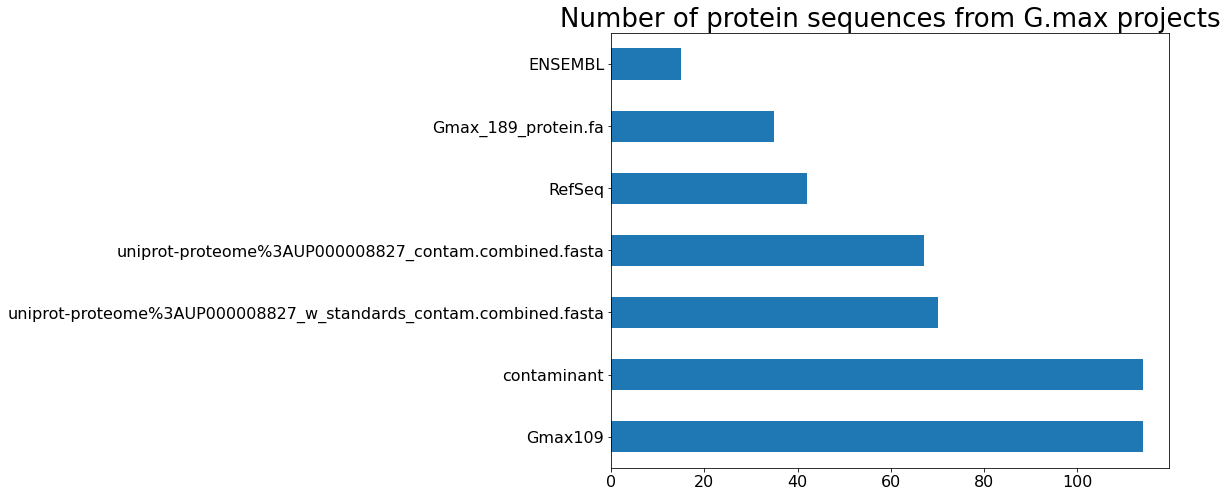

In [8]:
with open ("/home/tiago/documents/lncRNA/notebooks/studies/soja_dbs.json") as jsonfile:
    soja_dbs = json.load(jsonfile)
soja_bds_list = list(chain(*soja_dbs.values()))
pd.Series(soja_bds_list).value_counts().plot(kind = "barh", figsize = (10,8))
plt.title("Number of protein sequences from G.max projects", fontsize = 26)
plt.yticks(fontsize = 16)
plt.xticks(fontsize = 16)
plt.savefig("/home/tiago/documents/lncRNA/Gmax_dabases.png")

In [ ]:
import os
athaliana_bds = {}
for proj_dir,subdir,files in os.walk("/home/tiago/documents/lncRNA/A.thaliana"):
    if proj_dir.endswith("/generated"):
        for f in files:
            mzt_obj = mztab.MzTab(proj_dir+"/"+f)
            project_id = mzt_obj.metadata["mzTab-ID"]
            dbs = list(set(mzt_obj["PRT"].database.values))
            athaliana_bds[project_id] = dbs

In [ ]:
import json
with open("carab_dbs.json", "w") as outfile:
    json.dump(arab_bds, outfile)

In [9]:
with open ("/home/tiago/documents/lncRNA/athaliana.json") as jsonfile:
    athaliana_db = json.load(jsonfile)

In [10]:
athaliana_bds_list = list(chain(*athaliana_db.values()))

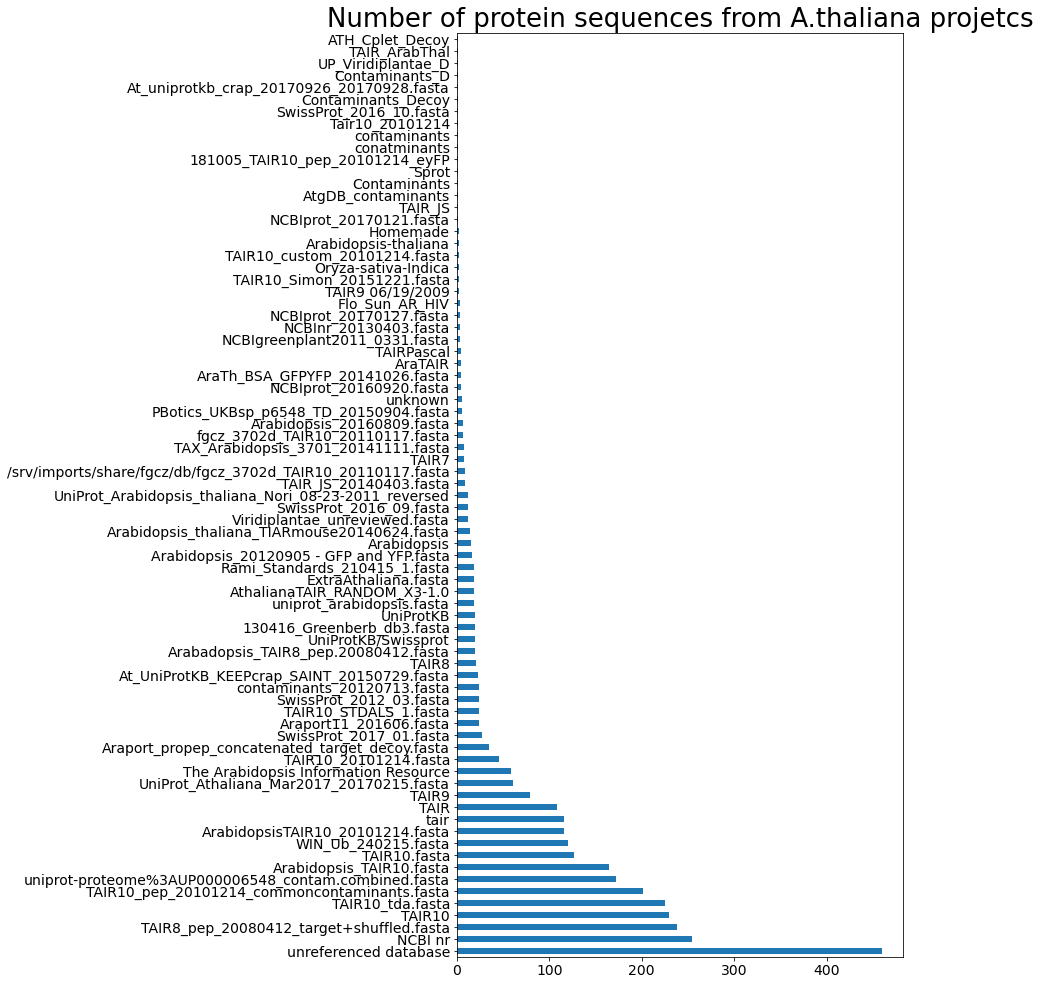

In [12]:
pd.Series(athaliana_bds_list).value_counts().plot(kind = "barh", figsize = (8,17))
plt.title("Number of protein sequences from A.thaliana projetcs", fontsize = 26)
plt.yticks(fontsize = 14)
plt.xticks(fontsize = 14)
plt.savefig("/home/tiago/documents/lncRNA/Athali_dabases.png")

In [59]:
set(soja["PRT"].database.values)

{'ENSEMBL'}

In [ ]:
def download_sequences(mztab_prt,out_file):
    """ """

    uniprot_url = 'https://www.uniprot.org/uploadlists/'
    params = {
        'from': 'ACC+ID', #swissprot accession
            'to': 'EMBL', #ENA accession
            'format': 'list',
            'query': f'{data.accession}'
            }
            pride_accession = urllib.parse.urlencode(params)
            pride_accession = pride_accession.encode('utf-8')
            pride_request = urllib.request.Request(uniprot_url, pride_accession)
            with urllib.request.urlopen(pride_request) as request_data:
                pride_request_response = request_data.read()
                
            ENA_accession = pride_request_response.decode("utf-8").split('\n')
            ENA_ulr = url = f"https://www.ebi.ac.uk/ena/browser/api/fasta/{ENA_accession[0]}?lineLimit=1000"
            ENA_seq_request = requests.get(url).text.split("\n")
            fasta_id = data.description
            fasta_seq = "".join(ENA_seq_request[1:])
            sequence_fasta_file.write(f">{fasta_id}\n")
            seddquence_fasta_file.write(f"{fasta_seq}\n")

In [89]:
test("Glyma0041s00280.1")

EMBL_ID
b''
EMBL
b''
P_ENTREZGENEID
b''
P_GI
b''
PIR
b''
REFSEQ_NT_ID
b''
P_REFSEQ_AC
b''


How to access uniprot information using mztab info?

BLAST

- 1.  qseqid: query or source (e.g., gene) sequence id

- 2.  sseqid: subject  or target (e.g., reference genome) sequence id

- 3.  pident: percentage of identical matches

- 4.  length: alignment length (sequence overlap)

- 5.  mismatch :number of mismatches

- 6.  gapopen: number of gap openings

- 7.  qstart: start of alignment in query

- 8.  qend: end of alignment in query

- 9.  sstart: start of alignment in subject

- 10. send: end of alignment in subject

- 11. evalue: expect value

- 12. bitscore: bit score

- 13. qseq: Aligned part of query sequence

- 14. sseq:      Aligned part of subject sequence